Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset

In [2]:
df=pd.read_csv('Mall_Customers.csv')

Exploring the data

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Checking for NaN values

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Detecting outliers using boxplot method

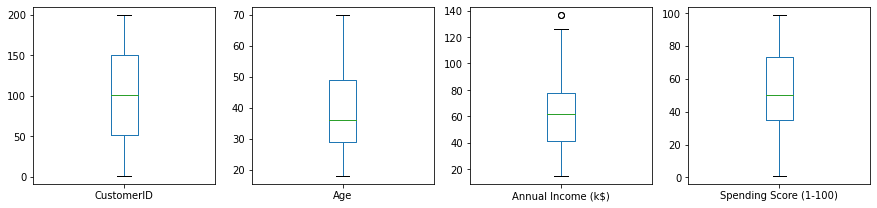

In [8]:
df.plot(kind="box", subplots = True,layout = (4,4),figsize=(15,15))
plt.show()

Handling outliers using boxplot method

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64


In [10]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-10-9479ebe7591b>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-10-9479ebe7591b>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


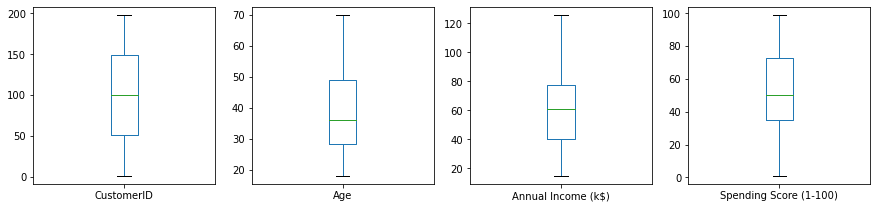

In [11]:
df.plot(kind="box", subplots = True,layout = (4,4),figsize=(15,15))
plt.show()

In [12]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.017285,0.984367,0.013840
Age,-0.017285,1.000000,0.004406,-0.329421
Annual Income (k$),0.984367,0.004406,1.000000,0.010080
Spending Score (1-100),0.013840,-0.329421,0.010080,1.000000


Visualizing the distribution of Annual Income

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

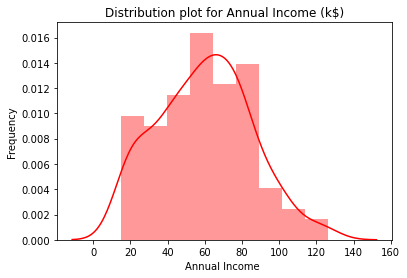

In [13]:
sns.distplot(df['Annual Income (k$)'],bins=None,hist=True,kde=True,color='red')
plt.title('Distribution plot for Annual Income (k$)')
plt.xlabel('Annual Income ')
plt.ylabel('Frequency')

Visualizing the distribution of Age

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

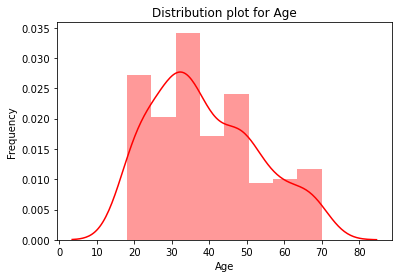

In [14]:
sns.distplot(df['Age'],bins=None,hist=True,kde=True,color='red')
plt.title('Distribution plot for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Visualizing the distribution of Spending Score

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

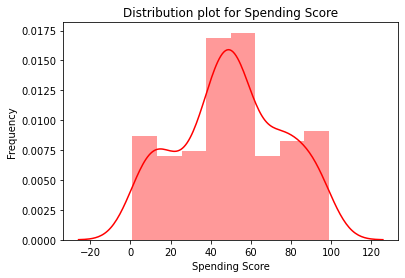

In [15]:
sns.distplot(df['Spending Score (1-100)'],bins=None,hist=True,kde=True,color='red')
plt.title('Distribution plot for Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')

Visualizing the Gender feature using a pie chart

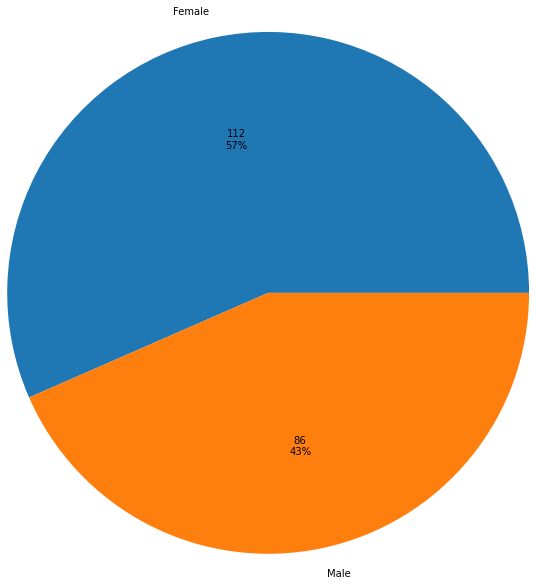

In [16]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

X=df.groupby('Gender').size()
mylabels=['Female','Male']
plt.pie(X, labels = mylabels,radius=3,autopct=label_function)

plt.show()

Selecting the relevant features for modelling

In [17]:
df=df[['Annual Income (k$)','Spending Score (1-100)']]

In [18]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Standardizing the features

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler

StandardScaler()

In [20]:
scaler.fit(df)
df = scaler.transform(df)

In [21]:
df=pd.DataFrame(df)

In [22]:
df.head()

,0,1
0,-1.779171,-0.435989
1,-1.779171,1.199413
2,-1.739447,-1.720949
3,-1.739447,1.043661
4,-1.699723,-0.397051


Visualization of data points using Scatter Plot

Text(0.5, 1.0, 'Scatter Plot')

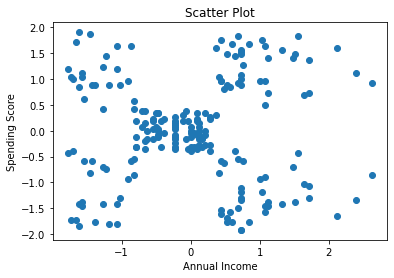

In [23]:
plt.scatter(df[0],df[1])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Scatter Plot')

Building K-means model with 2 clusters and predicting cluster for each data point

In [24]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
Y_pred = km.fit_predict(df)
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
df['cluster'] = Y_pred
df.head()

,0,1,cluster
0,-1.779171,-0.435989,1
1,-1.779171,1.199413,1
2,-1.739447,-1.720949,1
3,-1.739447,1.043661,1
4,-1.699723,-0.397051,1


Finding centroids for each cluster

In [26]:
km.cluster_centers_

array([[ 0.72996586, -0.00094396],
       [-0.91245733,  0.00117994]])

In [27]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
print(df1.shape)
print(df2.shape)

(110, 3)
(88, 3)


Visualising 2 clusters with centroids using scatter plot

Text(0, 0.5, 'Spendong Score')

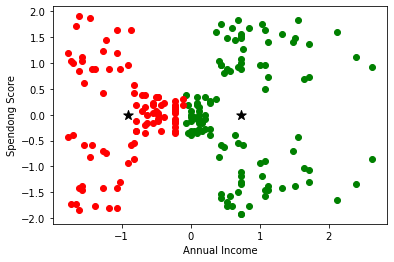

In [28]:
plt.scatter(df1[0],df1[1],color='g')
plt.scatter(df2[0],df2[1],color='r')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,color='k',marker='*',label='centroid')

plt.xlabel('Annual Income')
plt.ylabel('Spendong Score')

Using Elbow’s method to choose the optimal value of k

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'SSE')

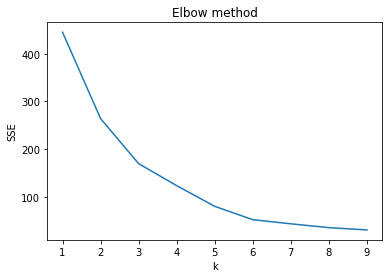

In [29]:
sse=[]
krange = range(1,10)
for k in krange:
    km=KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

plt.plot(krange,sse)
plt.title('Elbow method')
plt.xlabel('k')
plt.ylabel('SSE')

In [30]:
df=df.drop(['cluster'],axis=1)

Building K-means model with 6 clusters and predicting cluster for each data point

In [31]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=6)
Y_pred = km.fit_predict(df)
Y_pred

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 3, 5, 1, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 1, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4])

In [32]:
df['cluster'] = Y_pred
df.head()

,0,1,cluster
0,-1.779171,-0.435989,0
1,-1.779171,1.199413,2
2,-1.739447,-1.720949,0
3,-1.739447,1.043661,2
4,-1.699723,-0.397051,0


In [33]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]

Visualizing 4 clusters with centroids using scatter plo

Text(0, 0.5, 'Spending Score')

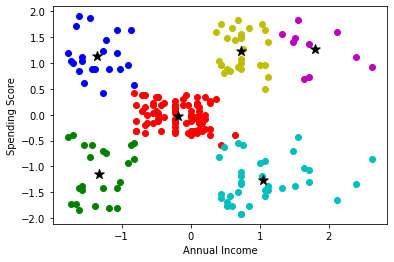

In [34]:
plt.scatter(df1[0],df1[1],color='g')
plt.scatter(df2[0],df2[1],color='r')
plt.scatter(df3[0],df3[1],color='b')
plt.scatter(df4[0],df4[1],color='c')
plt.scatter(df5[0],df5[1],color='m')
plt.scatter(df6[0],df6[1],color='y')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,color='k',marker='*',label='centroid')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

Finding Confusion Matrix for the model

In [35]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(df['cluster'],km.labels_))

Confusion Matrix
[[23  0  0  0  0  0]
 [ 0 80  0  0  0  0]
 [ 0  0 22  0  0  0]
 [ 0  0  0 35  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0 28]]


Checking the inertia of the model

In [36]:
km.inertia_

52.43612871836853

Predicting the cluster to which the data point belongs to

In [37]:
km.predict([[19,40]])

array([4])